In [47]:
import numpy as np

cd = np.load("CDResultsExperimental.npy")
hyp = np.load("HYPResultsExperimental.npy")
mi = np.load("MIResultsExperimental.npy")
sttc = np.load("STTCResultsExperimental.npy")

print(cd.shape)
print(hyp.shape)
print(mi.shape)
print(sttc.shape)

labels = np.load("Labels.npy",allow_pickle=True)
print(labels.shape)
cdTruthReal = np.zeros((len(labels),1))
hypTruthReal = np.zeros((len(labels),1))
miTruthReal = np.zeros((len(labels),1))
sttcTruthReal = np.zeros((len(labels),1))
normTruthReal = np.zeros((len(labels),1))
                   
for i in range(len(labels)):
    label = labels[i]
    if 'CD' in label:
        cdTruthReal[i] = 1
    if 'HYP' in label:
        hypTruthReal[i] = 1
    if 'MI' in label:
        miTruthReal[i] = 1
    if 'STTC' in label:
        sttcTruthReal[i] = 1
    if 'NORM' in label:
        normTruthReal[i] = 1
              
                     
                     

(193483, 1)
(193483, 1)
(193483, 1)
(193483, 1)
(193483,)


In [3]:
import pandas as pd

Matplotlib created a temporary config/cache directory at /localscratch-ssd/176552/matplotlib-4ibcl0tf because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


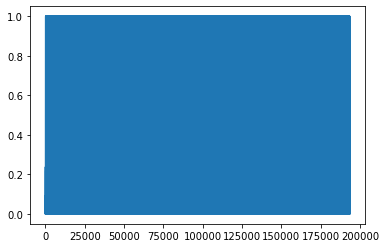

In [4]:
import matplotlib.pyplot as plt
plt.plot(cd[:])

In [5]:
np.average(cd)

0.42299232

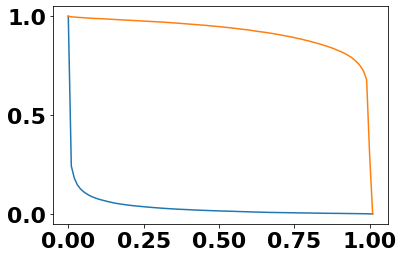

In [48]:
PDs = list()
PFAs = list()
thresholds = list()
for i in np.arange(-0.00001,1.011,0.01):    
    cdTruthReal = cdTruthReal.flatten().astype(bool)
    normTruthReal = normTruthReal.flatten().astype(bool)

    cdPred = cd[normTruthReal | cdTruthReal] > i
    cdTruth = cdTruthReal[normTruthReal | cdTruthReal]

#     print("True value counts")
#     print(pd.DataFrame(cdTruth).value_counts())
#     print("Predicted value counts")
#     print(pd.DataFrame(cdPred).value_counts())
#     print(cdPred.shape)
#     print(cdTruth.shape)
#     print(cdPred.shape)
# 
    cdPred = cdPred.flatten().astype(bool)
    cdTruth = cdTruth.flatten().astype(bool)

    CorrectDetections = np.sum((cdPred == 1) & (cdTruth == 1))
    FalseDetections = np.sum((cdPred == 1) & (cdTruth == 0))

    CorrectMisses = np.sum((cdPred == 0) & (cdTruth == 0))
    MissedDetections = np.sum((cdPred == 0) & (cdTruth == 1))

#     print(CorrectMisses) 
#     print(MissedDetections)

    PFA = FalseDetections / (FalseDetections + CorrectMisses)
#     print("PFA:", PFA)

#     print(CorrectDetections)
#     print(FalseDetections)
    Acc = (CorrectDetections + CorrectMisses) /   (CorrectDetections + CorrectMisses + MissedDetections + FalseDetections)
    
#     print("Accuracy :", Acc, "Threshold :", i)
    PD = CorrectDetections / (CorrectDetections + MissedDetections)
    PDs.append(PD)
    PFAs.append(PFA)
    thresholds.append(i)
#     print("PD:", PD)
plt.plot(thresholds, PFAs)
plt.plot(thresholds,PDs)
PFACd = PFAs
PDCd = PDs

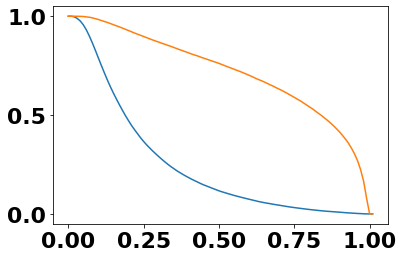

In [25]:
PDs = list()
PFAs = list()
thresholds = list()

for i in np.arange(-0.00001,1.011,0.01):
    miTruthReal = miTruthReal.flatten().astype(bool)
    normTruthReal = normTruthReal.flatten().astype(bool)

    miPred = mi[normTruthReal | miTruthReal] > i
    miTruth = miTruthReal[normTruthReal | miTruthReal]

#     print("True value counts")
#     print(pd.DataFrame(cdTruth).value_counts())
#     print("Predicted value counts")
#     print(pd.DataFrame(cdPred).value_counts())
#     print(cdPred.shape)
#     print(cdTruth.shape)
#     print(cdPred.shape)
# 
    miPred = miPred.flatten().astype(bool)
    miTruth = miTruth.flatten().astype(bool)

    CorrectDetections = np.sum((miPred == 1) & (miTruth == 1))
    FalseDetections = np.sum((miPred == 1) & (miTruth == 0))

    CorrectMisses = np.sum((miPred == 0) & (miTruth == 0))
    MissedDetections = np.sum((miPred == 0) & (miTruth == 1))

#     print(CorrectMisses) 
#     print(MissedDetections)

    PFA = FalseDetections / (FalseDetections + CorrectMisses)
#     print("PFA:", PFA)

#     print(CorrectDetections)
#     print(FalseDetections)

    PD = CorrectDetections / (CorrectDetections + MissedDetections)
    PDs.append(PD)
    PFAs.append(PFA)
    thresholds.append(i)
#     print("PD:", PD)
plt.plot(thresholds, PFAs)
plt.plot(thresholds,PDs)
PFAMi = PFAs
PDMi = PDs

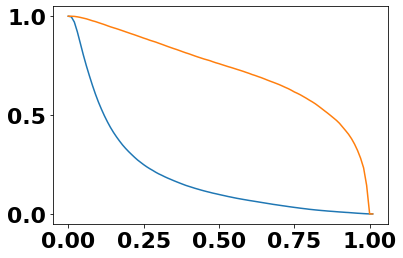

In [26]:
PDs = list()
PFAs = list()
thresholds = list()

for i in np.arange(-0.00001,1.011,0.01):
    hypTruthReal = hypTruthReal.flatten().astype(bool)
    normTruthReal = normTruthReal.flatten().astype(bool)

    hypPred = hyp[normTruthReal | hypTruthReal] > i
    hypTruth = hypTruthReal[normTruthReal | hypTruthReal]

#     print("True value counts")
#     print(pd.DataFrame(cdTruth).value_counts())
#     print("Predicted value counts")
#     print(pd.DataFrame(cdPred).value_counts())
#     print(cdPred.shape)
#     print(cdTruth.shape)
#     print(cdPred.shape)
# 
    hypPred = hypPred.flatten().astype(bool)
    hypTruth = hypTruth.flatten().astype(bool)

    CorrectDetections = np.sum((hypPred == 1) & (hypTruth == 1))
    FalseDetections = np.sum((hypPred == 1) & (hypTruth == 0))

    CorrectMisses = np.sum((hypPred == 0) & (hypTruth == 0))
    MissedDetections = np.sum((hypPred == 0) & (hypTruth == 1))

#     print(CorrectMisses) 
#     print(MissedDetections)

    PFA = FalseDetections / (FalseDetections + CorrectMisses)
#     print("PFA:", PFA)

#     print(CorrectDetections)
#     print(FalseDetections)

    PD = CorrectDetections / (CorrectDetections + MissedDetections)
    PDs.append(PD)
    PFAs.append(PFA)
    thresholds.append(i)
#     print("PD:", PD)
plt.plot(thresholds, PFAs)
plt.plot(thresholds,PDs)
PFAHyp = PFAs
PDHyp = PDs

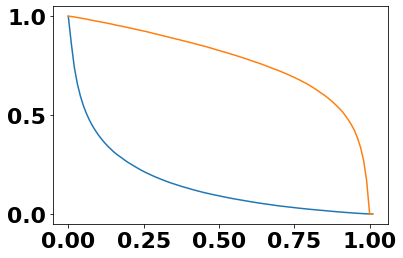

In [27]:
PDs = list()
PFAs = list()
thresholds = list()

for i in np.arange(-0.00001,1.011,0.01):

    sttcTruthReal = sttcTruthReal.flatten().astype(bool)
    normTruthReal = normTruthReal.flatten().astype(bool)

    sttcPred = sttc[normTruthReal | sttcTruthReal] > i
    sttcTruth = sttcTruthReal[normTruthReal | sttcTruthReal]

#     print("True value counts")
#     print(pd.DataFrame(cdTruth).value_counts())
#     print("Predicted value counts")
#     print(pd.DataFrame(cdPred).value_counts())
#     print(cdPred.shape)
#     print(cdTruth.shape)
#     print(cdPred.shape)
# 
    sttcPred = sttcPred.flatten().astype(bool)
    sttcTruth = sttcTruth.flatten().astype(bool)

    CorrectDetections = np.sum((sttcPred == 1) & (sttcTruth == 1))
    FalseDetections = np.sum((sttcPred == 1) & (sttcTruth == 0))

    CorrectMisses = np.sum((sttcPred == 0) & (sttcTruth == 0))
    MissedDetections = np.sum((sttcPred == 0) & (sttcTruth == 1))

#     print(CorrectMisses) 
#     print(MissedDetections)

    PFA = FalseDetections / (FalseDetections + CorrectMisses)
#     print("PFA:", PFA)

#     print(CorrectDetections)
#     print(FalseDetections)

    PD = CorrectDetections / (CorrectDetections + MissedDetections)
    PDs.append(PD)
    PFAs.append(PFA)
    thresholds.append(i)
#     print("PD:", PD)
plt.plot(thresholds, PFAs)
plt.plot(thresholds,PDs)
# plt.plot(PFAs,PDs)
PFASttc = PFAs
PDSttc = PDs

In [52]:

hypTruthReal = hypTruthReal.flatten().astype(bool)
normTruthReal = normTruthReal.flatten().astype(bool)

hypPred = hyp[normTruthReal | hypTruthReal] > 0.5
hypTruth = hypTruthReal[normTruthReal | hypTruthReal]

#     print("True value counts")
#     print(pd.DataFrame(cdTruth).value_counts())
#     print("Predicted value counts")
#     print(pd.DataFrame(cdPred).value_counts())
#     print(cdPred.shape)
#     print(cdTruth.shape)
#     print(cdPred.shape)
# 
hypPred = hypPred.flatten().astype(bool)
hypTruth = hypTruth.flatten().astype(bool)

CorrectDetections = np.sum((hypPred == 1) & (hypTruth == 1))
FalseDetections = np.sum((hypPred == 1) & (hypTruth == 0))

CorrectMisses = np.sum((hypPred == 0) & (hypTruth == 0))
MissedDetections = np.sum((hypPred == 0) & (hypTruth == 1))

print("Recall:", CorrectDetections / (CorrectDetections + MissedDetections))
print("Precision:" , CorrectDetections / (CorrectDetections + FalseDetections))
print("Accuracy:", (CorrectDetections + CorrectMisses ) / (CorrectDetections + CorrectMisses + FalseDetections + MissedDetections) )

Recall: 0.9720767185107583
Precision: 0.9392641619622347
Accuracy: 0.9784399850716274


In [49]:

cdTruthReal = cdTruthReal.flatten().astype(bool)
normTruthReal = normTruthReal.flatten().astype(bool)

cdPred = cd[normTruthReal | cdTruthReal] > 0.5
cdTruth = cdTruthReal[normTruthReal | cdTruthReal]

#     print("True value counts")
#     print(pd.DataFrame(cdTruth).value_counts())
#     print("Predicted value counts")
#     print(pd.DataFrame(cdPred).value_counts())
#     print(cdPred.shape)
#     print(cdTruth.shape)
#     print(cdPred.shape)
# 
Pred = cdPred.flatten().astype(bool)
Truth = cdTruth.flatten().astype(bool)

CorrectDetections = np.sum((Pred == 1) & (Truth == 1))
FalseDetections = np.sum((Pred == 1) & (Truth == 0))

CorrectMisses = np.sum((Pred == 0) & (Truth == 0))
MissedDetections = np.sum((Pred == 0) & (Truth == 1))

print("Recall:", CorrectDetections / (CorrectDetections + MissedDetections))
print("Precision:" , CorrectDetections / (CorrectDetections + FalseDetections))
print("Accuracy:", (CorrectDetections + CorrectMisses ) / (CorrectDetections + CorrectMisses + FalseDetections + MissedDetections) )

Recall: 0.9474497335542519
Precision: 0.9733403873579611
Accuracy: 0.9710003474002878


In [53]:

sttcTruthReal = sttcTruthReal.flatten().astype(bool)
normTruthReal = normTruthReal.flatten().astype(bool)

sttcPred = sttc[normTruthReal | sttcTruthReal] > 0.5
sttcTruth = sttcTruthReal[normTruthReal | sttcTruthReal]

#     print("True value counts")
#     print(pd.DataFrame(cdTruth).value_counts())
#     print("Predicted value counts")
#     print(pd.DataFrame(cdPred).value_counts())
#     print(cdPred.shape)
#     print(cdTruth.shape)
#     print(cdPred.shape)
# 
Pred = sttcPred.flatten().astype(bool)
Truth = sttcTruth.flatten().astype(bool)

CorrectDetections = np.sum((Pred == 1) & (Truth == 1))
FalseDetections = np.sum((Pred == 1) & (Truth == 0))

CorrectMisses = np.sum((Pred == 0) & (Truth == 0))
MissedDetections = np.sum((Pred == 0) & (Truth == 1))

print("Recall:", CorrectDetections / (CorrectDetections + MissedDetections))
print("Precision:" , CorrectDetections / (CorrectDetections + FalseDetections))
print("Accuracy:", (CorrectDetections + CorrectMisses ) / (CorrectDetections + CorrectMisses + FalseDetections + MissedDetections) )

Recall: 0.9630317153126111
Precision: 0.9737425370899143
Accuracy: 0.9754881978787716


In [54]:

miTruthReal = miTruthReal.flatten().astype(bool)
normTruthReal = normTruthReal.flatten().astype(bool)

miPred = mi[normTruthReal | miTruthReal] > 0.5
miTruth = miTruthReal[normTruthReal | miTruthReal]

#     print("True value counts")
#     print(pd.DataFrame(cdTruth).value_counts())
#     print("Predicted value counts")
#     print(pd.DataFrame(cdPred).value_counts())
#     print(cdPred.shape)
#     print(cdTruth.shape)
#     print(cdPred.shape)
# 
Pred = miPred.flatten().astype(bool)
Truth = miTruth.flatten().astype(bool)

CorrectDetections = np.sum((Pred == 1) & (Truth == 1))
FalseDetections = np.sum((Pred == 1) & (Truth == 0))

CorrectMisses = np.sum((Pred == 0) & (Truth == 0))
MissedDetections = np.sum((Pred == 0) & (Truth == 1))

print("Recall:", CorrectDetections / (CorrectDetections + MissedDetections))
print("Precision:" , CorrectDetections / (CorrectDetections + FalseDetections))
print("Accuracy:", (CorrectDetections + CorrectMisses ) / (CorrectDetections + CorrectMisses + FalseDetections + MissedDetections) )

Recall: 0.9813097217492338
Precision: 0.9602273841027149
Accuracy: 0.9771508797914111


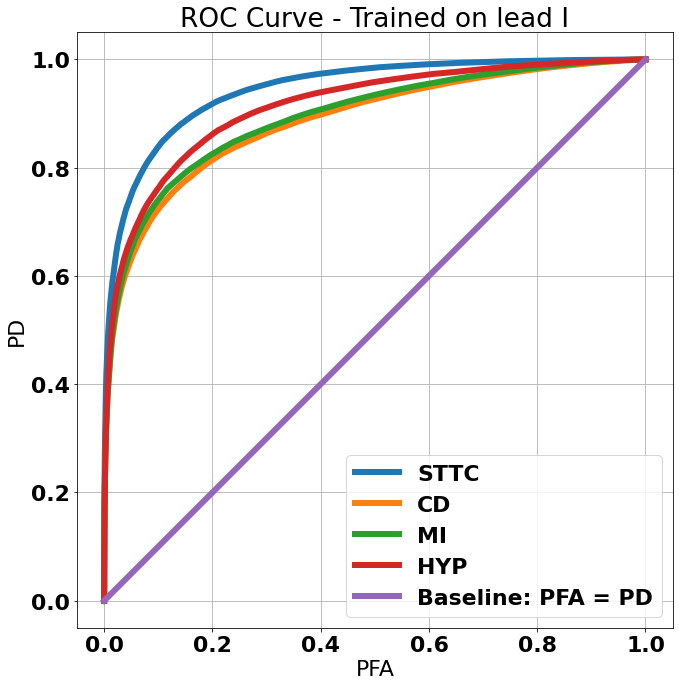

In [29]:
import matplotlib
fig = plt.figure()
ax = fig.add_subplot()

font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.plot(PFASttc,PDSttc, label = 'STTC',linewidth = 6)
plt.plot(PFACd,PDCd, label = 'CD',linewidth = 6)
plt.plot(PFAMi,PDMi, label = 'MI',linewidth = 6)
plt.plot(PFAHyp,PDHyp, label = 'HYP',linewidth = 6)
plt.plot(np.arange(0,1.01,0.01),np.arange(0,1.01,0.01), label ='Baseline: PFA = PD',linewidth = 6)
plt.xlabel("PFA")
plt.ylabel("PD")
plt.title("ROC Curve - Trained on lead I") 
# square plot
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_aspect('equal', adjustable='box')

fig.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.plot(PFAs)

In [ ]:
print("HYP")

print("True value counts")
print(pd.DataFrame(hypTruth).value_counts())

hypPred = (0.06*  hyp[:,1]) > hyp[:,0]

print("Predicted value counts")
print(pd.DataFrame(hypPred).value_counts())
print(hypPred.shape)
hypTruth = hypTruth.flatten().astype(bool)
print(hypTruth.shape)

CorrectDetections = np.sum((hypPred == 1) & (hypTruth == 1))
FalseDetections = np.sum((hypPred == 1) & (hypTruth == 0))

CorrectMisses = np.sum((hypPred == 0) & (hypTruth == 0))
MissedDetections = np.sum((hypPred == 0) & (hypTruth == 1))
 
print(CorrectMisses)
print(MissedDetections)

PFA = FalseDetections / (CorrectMisses + FalseDetections)
print("PFA:", PFA)

print(CorrectDetections)
print(FalseDetections)

PD = CorrectDetections / (CorrectDetections + MissedDetections)
print("PD:", PD)

In [ ]:
print("STTC")

print("True value counts")
print(pd.DataFrame(sttcTruth).value_counts())

sttcPred = (0.05*  sttc[:,1]) > sttc[:,0]

print("Predicted value counts")
print(pd.DataFrame(sttcPred).value_counts())
print(sttcPred.shape)
sttcTruth = sttcTruth.flatten().astype(bool)
print(sttcTruth.shape)

CorrectDetections = np.sum((sttcPred == 1) & (sttcTruth == 1))
FalseDetections = np.sum((sttcPred == 1) & (sttcTruth == 0))

CorrectMisses = np.sum((sttcPred == 0) & (sttcTruth == 0))
MissedDetections = np.sum((sttcPred == 0) & (sttcTruth == 1))
 
print(CorrectMisses)
print(MissedDetections)

PFA = FalseDetections / (CorrectMisses + FalseDetections)
print("PFA:", PFA)

print(CorrectDetections)
print(FalseDetections)

PD = CorrectDetections / (CorrectDetections + MissedDetections)
print("PD:", PD)

In [ ]:
print("MI")

print("True value counts")
print(pd.DataFrame(miTruth).value_counts())

miPred = (0.1*  mi[:,1]) > mi[:,0]

print("Predicted value counts")
print(pd.DataFrame(miPred).value_counts())
print(miPred.shape)
miTruth = miTruth.flatten().astype(bool)
print(miTruth.shape)

CorrectDetections = np.sum((miPred == 1) & (miTruth == 1))
FalseDetections = np.sum((miPred == 1) & (miTruth == 0))

CorrectMisses = np.sum((miPred == 0) & (miTruth == 0))
MissedDetections = np.sum((miPred == 0) & (miTruth == 1))
 
print(CorrectMisses)
print(MissedDetections)

PFA = FalseDetections / (CorrectMisses + FalseDetections)
print("PFA:", PFA)

print(CorrectDetections)
print(FalseDetections)

PD = CorrectDetections / (CorrectDetections + MissedDetections)
print("PD:", PD)

In [ ]:
sttcTruth

In [ ]:
# pd.DataFrame(miTruth).value_counts()

In [ ]:
# pd.DataFrame(sttcTruth).value_counts()

In [ ]:
cdPred.shape

In [ ]:
cdTruth = cdTruth.flatten().astype(bool)
cdTruth.shape

In [ ]:
CorrectDetections = np.sum((cdPred == 1) & (cdTruth == 1))
FalseDetections = np.sum((cdPred == 1) & (cdTruth == 0))

CorrectMisses = np.sum((cdPred == 0) & (cdTruth == 0))
MissedDetections = np.sum((cdPred == 0) & (cdTruth == 1))




In [ ]:
CorrectMisses

In [ ]:
MissedDetections

In [ ]:
PFA = MissedDetections / (CorrectMisses + MissedDetections)

In [ ]:
PFA

In [ ]:
CorrectDetections

In [ ]:
FalseDetections

In [ ]:
PD = CorrectDetections / (CorrectDetections + FalseDetections)

In [ ]:
PD

In [ ]:
(cdPred == 0).nonzero()

In [ ]:
correctPreds.shape

In [ ]:
Accuracy = np.sum(correctPreds)

In [ ]:
Accuracy/ 193800